In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("log.csv")

data[' Call Duration']= pd.to_datetime(data[' Call Duration'], format=" %H:%M:%S")
# Before Adding Total call duration
print(data.head())

   From Mobile   To Mobile       Call Duration
0   9898989898  8989898989 1900-01-01 00:05:23
1   1898989898  9989898989 1900-01-01 01:00:23
2   2898989898  7989898989 1900-01-01 00:00:21
3   2898989898  6989898989 1900-01-01 00:00:23
4   4898989898  5989898989 1900-01-01 00:01:23


In [2]:
data['HR'] = data[' Call Duration'].dt.hour
data['MIN'] = data[' Call Duration'].dt.minute
data['SEC'] = data[' Call Duration'].dt.second
data['Total Duration in seconds'] = data['HR']*3600 + data['MIN']*60+data['SEC']
# After Adding Total call duration
print(data.head())

   From Mobile   To Mobile       Call Duration  HR  MIN  SEC  \
0   9898989898  8989898989 1900-01-01 00:05:23   0    5   23   
1   1898989898  9989898989 1900-01-01 01:00:23   1    0   23   
2   2898989898  7989898989 1900-01-01 00:00:21   0    0   21   
3   2898989898  6989898989 1900-01-01 00:00:23   0    0   23   
4   4898989898  5989898989 1900-01-01 00:01:23   0    1   23   

   Total Duration in seconds  
0                        323  
1                       3623  
2                         21  
3                         23  
4                         83  


## 1. Find the distinct From Numbers for a day

In [3]:
Distinct_number = data['From Mobile'].value_counts()
Distinct_number

2898989898    3
1898989898    2
5898989898    2
1098989898    1
8898989898    1
4898989898    1
9898989898    1
7898989898    1
Name: From Mobile, dtype: int64

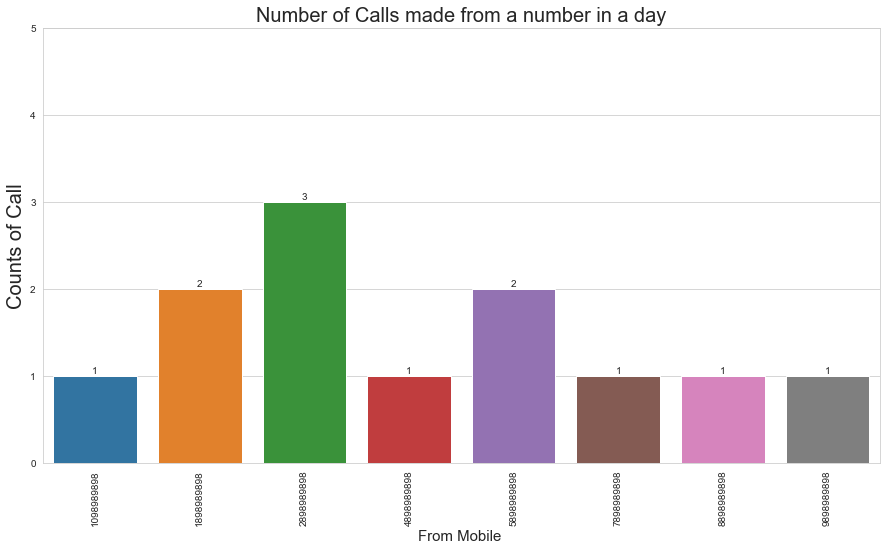

In [4]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
plt.title("Number of Calls made from a number in a day", fontsize=20)
plt.xlabel('From Mobile ',fontsize=15)
plt.ylabel('Counts of Call', fontsize=20)
ax = sns.barplot(x=Distinct_number.index, y=Distinct_number.values,
                 data=data,
                 errwidth=0)

plt.rc('xtick', labelsize=16, ) 
plt.rc('ytick', labelsize=10, ) 
plt.ylim(0,5)
plt.xticks(rotation='vertical')
ax.bar_label(ax.containers[0]);

## 2. Find the distinct From Numbers who used the Free Plan. (Call Duration less than 1 min)

In [5]:
d = data[['From Mobile','Total Duration in seconds']][data['Total Duration in seconds']<60]
d = d['From Mobile'].value_counts()
d

2898989898    2
5898989898    1
1098989898    1
1898989898    1
Name: From Mobile, dtype: int64

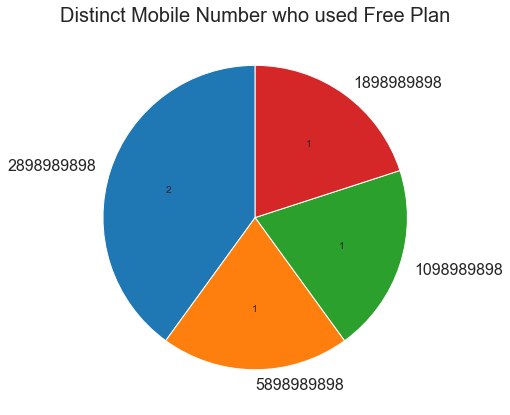

In [6]:
def absolute_value(val):
    a  = int(np.round(val/100.*counts.sum()))
    return a

label = d.index
counts = d.values
plt.figure(figsize=(15, 7))
plt.title("Distinct Mobile Number who used Free Plan", fontsize=20)
plt.pie(counts,labels = label,autopct=absolute_value,startangle=90) # autopct is used to display the values in number format
plt.show();

## 3. Find the total call duration with respect to From Number

In [7]:
b = data[['From Mobile','Total Duration in seconds']]
b= b.groupby('From Mobile')['Total Duration in seconds'].sum() 
b

From Mobile
1098989898      23
1898989898    3663
2898989898     367
4898989898      83
5898989898     378
7898989898     143
8898989898     320
9898989898     323
Name: Total Duration in seconds, dtype: int64

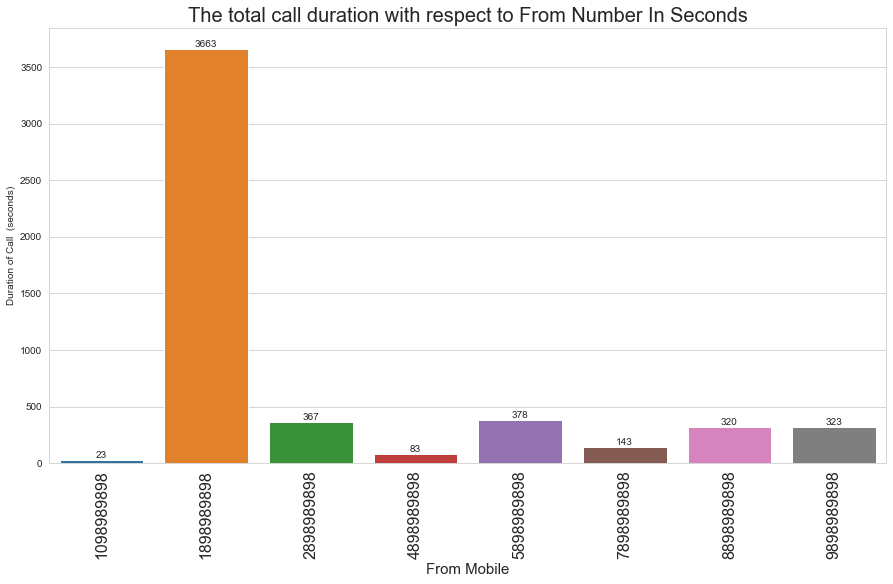

In [8]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
plt.title("The total call duration with respect to From Number In Seconds", fontsize=20)
plt.xlabel('From Mobile ',fontsize=15)
plt.ylabel('Duration of Call  (seconds)', fontsize=10)
ax = sns.barplot(x=b.index, y=b.values,
                 data=data,
                 errwidth=0)

plt.rc('xtick', labelsize=16, ) 
plt.rc('ytick', labelsize=10, ) 
# plt.ylim(0,5)
plt.xticks(rotation='vertical')
ax.bar_label(ax.containers[0]);

## 4. Find the total income for a day. (Cost to be considered for Call Duration greater 1 min)

In [9]:
a = data['Total Duration in seconds'][data['Total Duration in seconds']>=60]
price = 0
for i in a.values:
    if i%60 ==0:
        price +=  (30*(i//60))
    else:
        price += (30*((i//60)+1))
print("The Total Income of a day is Rs",price/100)

The Total Income of a day is Rs 27.0
